# TP 2: Bayes Naive
___
Lucas Nahuel Raimondi

Manuel Davila

Dolores Levi

# Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import sklearn.naive_bayes

from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import make_pipeline


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/train.csv

--2023-12-07 16:23:06--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72229641 (69M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  68.88M   233MB/s    in 0.3s    

2023-12-07 16:23:08 (233 MB/s) - ‘train.csv’ saved [72229641/72229641]



In [ ]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/test.csv

--2023-12-07 16:23:08--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11054515 (11M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]  10.54M  --.-KB/s    in 0.1s    

2023-12-07 16:23:08 (103 MB/s) - ‘test.csv’ saved [11054515/11054515]



# Preprocesamiento

In [ ]:
df = pd.read_csv('train.csv')
df_filtrado = df.copy()

In [ ]:
df_filtrado['sentimiento_encodeado'] = df_filtrado['sentimiento'].map({'positivo': 1, 'negativo': 0})
df_filtrado

,ID,review_es,sentimiento,sentimiento_encodeado
0,0,Uno de los otros críticos ha mencionado que de...,positivo,1
1,1,Una pequeña pequeña producción.La técnica de f...,positivo,1
2,2,Pensé que esta era una manera maravillosa de p...,positivo,1
3,3,"Básicamente, hay una familia donde un niño peq...",negativo,0
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,1
...,...,...,...,...
49995,49995,Pensé que esta película hizo un buen trabajo a...,positivo,1
49996,49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,0
49997,49997,Soy católica enseñada en escuelas primarias pa...,negativo,0
49998,49998,Voy a tener que estar en desacuerdo con el com...,negativo,0


In [ ]:
df_filtrado['sentimiento'].unique()

array(['positivo', 'negativo'], dtype=object)

In [ ]:
df_filtrado['sentimiento'].value_counts()

positivo    25000
negativo    25000
Name: sentimiento, dtype: int64

In [ ]:
df_filtrado.isna().any()

ID                       False
review_es                False
sentimiento              False
sentimiento_encodeado    False
dtype: bool

## Deteccion de Lenguaje

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=9fd667751f731009beb728e619952132fa5122a05aafefe94de87fa574f2ea3a
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect

for i, row in df_filtrado.iterrows():
  df_filtrado.loc[i,'lang'] = detect(row.review_es)

In [ ]:
df_filtrado.query('lang != "es"')
df_filtrado = df_filtrado.loc[df_filtrado.lang == 'es']

# Entrenamiento

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_filtrado.review_es,
                                                    df_filtrado.sentimiento_encodeado,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    shuffle=True)

In [ ]:
y_train

9600     0
26150    0
49982    0
26458    1
15629    1
        ..
22726    0
47681    1
44362    1
45327    0
3015     0
Name: sentimiento_encodeado, Length: 33727, dtype: int64

## Parametros

In [ ]:
tf_idf = TfidfVectorizer(ngram_range = (1,2),
                         min_df = 0.01,
                         max_df = 0.5,
                         lowercase = True)


x_train_vectorizado = tf_idf.fit_transform(x_train)
x_test_vectorizado = tf_idf.transform(x_test)

In [ ]:
bayes_model = sklearn.naive_bayes.MultinomialNB(force_alpha = False,
                                                fit_prior = True,
                                                class_prior = None,
                                                alpha = 1
                                                )
model = bayes_model.fit(x_train_vectorizado, y_train)

In [ ]:
predict = model.predict(x_test_vectorizado)

In [ ]:
predict

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
y_test.value_counts()

1    7314
0    7141
Name: sentimiento_encodeado, dtype: int64

Text(50.722222222222214, 0.5, 'True')

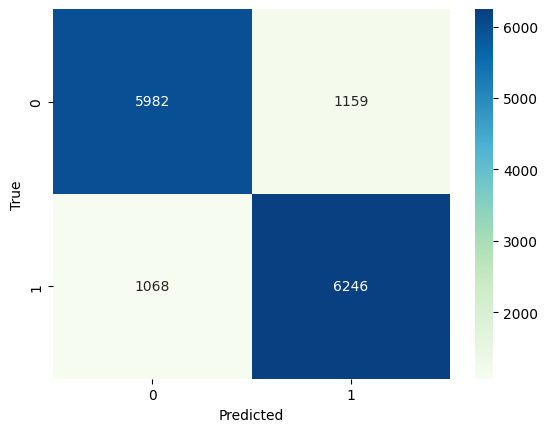

In [ ]:
tabla=confusion_matrix(y_test, predict)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
accuracy=accuracy_score(y_test,predict)
recall=recall_score(y_test,predict)
f1=f1_score(y_test,predict)
precision=precision_score(y_test,predict)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8459356624005534
Recall: 0.8539786710418376
Precision: 0.8434841323430115
f1 score: 0.8486989605272096


In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7141
           1       0.84      0.85      0.85      7314

    accuracy                           0.85     14455
   macro avg       0.85      0.85      0.85     14455
weighted avg       0.85      0.85      0.85     14455



# Test

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
df_test_filtrado = df_test.copy()

In [ ]:
df_test_filtrado

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
...,...,...
8594,68594,"Buena no, lo siguiente. Por fin un film serio ..."
8595,68595,"Me esperaba mucho, pero que mucho, más.Guión m..."
8596,68596,"De mal cuerpo como sensación al finalizar, de ..."
8597,68597,Los que han añadido comentarios os lo han dich...


In [ ]:
test_vectorizado = tf_idf.transform(df_test_filtrado.review_es)
test_pred = model.predict(test_vectorizado)

In [ ]:
df_test_ids = df_test['ID']

In [ ]:
data = {'ID': df_test_ids, 'sentimiento': test_pred}
df_final = pd.DataFrame(data)

In [ ]:
df_final['sentimiento'] = df_final['sentimiento'].map({1: 'positivo', 0: 'negativo'})

In [ ]:
df_final.to_csv('submission.csv', index=False)